In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'jabref/jabref'

In [11]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3971,tfidf,5,0,4,[src/main/java/org/jabref/logic/help/HelpFile....,[src/main/java/net/sf/jabref/gui/importer/fetc...,2018-04-29T12:18:50Z,43,Add RFC Standard Fetcher,0.000000,0.218712,0.166119,0.000000,jabref/jabref
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4233,tfidf,5,0,5,[src/main/java/org/jabref/gui/collab/ChangeSca...,"[src/main/java/org/jabref/gui/BasePanel.java, ...",2018-08-23T17:05:07Z,64,Nullpointerexception while merging entries,0.000000,0.217365,0.144060,0.125260,jabref/jabref
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4113,tfidf,5,0,2,[src/main/java/org/jabref/logic/integrity/Page...,[src/main/java/net/sf/jabref/gui/openoffice/OO...,2018-11-20T07:43:58Z,15,Improve check for page numbers,0.000000,0.208106,0.098549,0.000000,jabref/jabref
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4622,tfidf,5,7,7,[src/main/java/org/jabref/gui/JabRefFrame.java...,"[src/main/java/net/sf/jabref/JabRefMain.java, ...",2019-02-01T15:08:01Z,86,Reset preferences throws not on FX Thread exce...,0.400000,0.307038,0.159928,0.000000,jabref/jabref
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4591,tfidf,5,0,3,[src/main/java/org/jabref/logic/integrity/Edit...,[src/main/java/org/jabref/logic/integrity/Page...,2019-02-13T06:05:54Z,20,Add check for books with first edition,0.000000,0.172627,0.157353,0.140160,jabref/jabref
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",9699,sbert,3,0,4,[src/main/java/org/jabref/logic/msbib/MSBibCon...,"[src/main/resources/l10n/JabRef_da.properties,...",2023-04-15T18:21:32Z,24,Export Office 2007 bibliography source with LCID,0.000000,0.490212,0.481552,0.476129,jabref/jabref
2444,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",9372,sbert,3,0,2,[src/main/java/org/jabref/gui/util/FileFilterC...,[src/main/java/org/jabref/cli/ArgumentProcesso...,2023-04-28T18:29:18Z,10,Save/save as: file type shows BIBTEX_DB,0.000000,0.792997,0.782301,0.777735,jabref/jabref
2445,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",9685,sbert,3,1,3,[src/main/java/org/jabref/gui/search/GlobalSea...,[src/main/java/org/jabref/gui/importer/ImportE...,2023-05-04T07:39:50Z,16,Improve the recording of the search history,0.037037,0.580427,0.550968,0.538006,jabref/jabref
2446,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",9818,sbert,3,4,7,[src/main/java/org/jabref/gui/librarypropertie...,[src/main/java/org/jabref/gui/JabRefFrame.java...,2023-05-06T18:43:34Z,31,Rearrange content of Library Properties Dialog,0.000000,0.488878,0.442010,0.441246,jabref/jabref


# Histplot


<AxesSubplot: xlabel='number', ylabel='Count'>

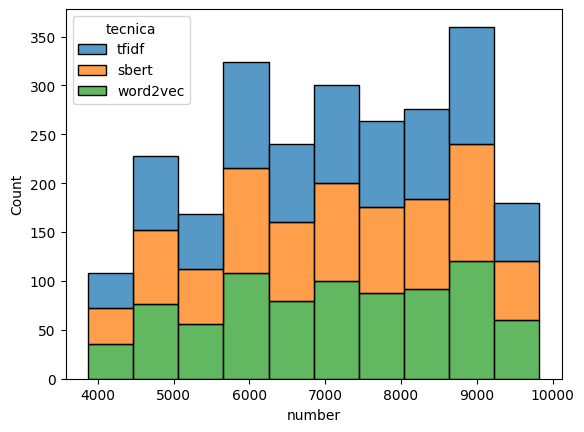

In [5]:
sns.histplot(df, x='number', bins=10, stat='count', hue='tecnica', multiple='stack')

# Mapk

<AxesSubplot: xlabel='topk', ylabel='mapk'>

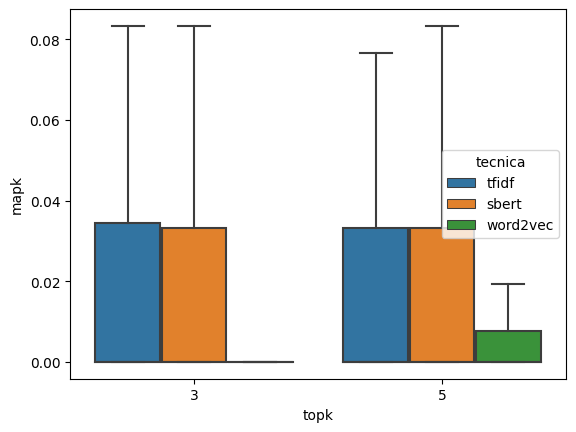

In [6]:
sns.boxplot(df, x="topk", y="mapk", hue="tecnica", showfliers=False)

# Similaridades maiores

<AxesSubplot: xlabel='topk', ylabel='max_sim'>

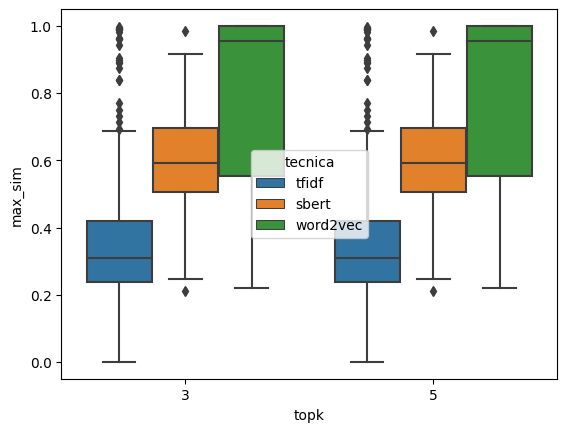

In [7]:
sns.boxplot(df, x="topk", y="max_sim", hue="tecnica")

# Similaridades menores

<AxesSubplot: xlabel='topk', ylabel='min_sim'>

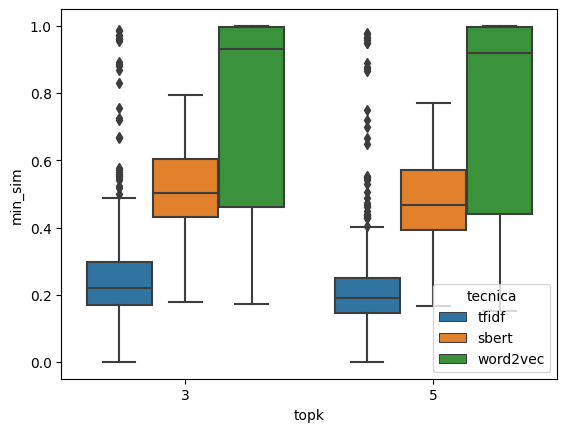

In [8]:
sns.boxplot(df, x="topk", y="min_sim", hue="tecnica")

# Acertos

<AxesSubplot: xlabel='topk', ylabel='acertos'>

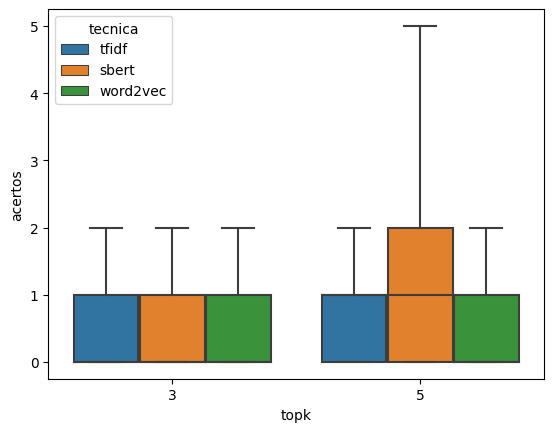

In [9]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

<AxesSubplot: xlabel='topk', ylabel='acertos'>

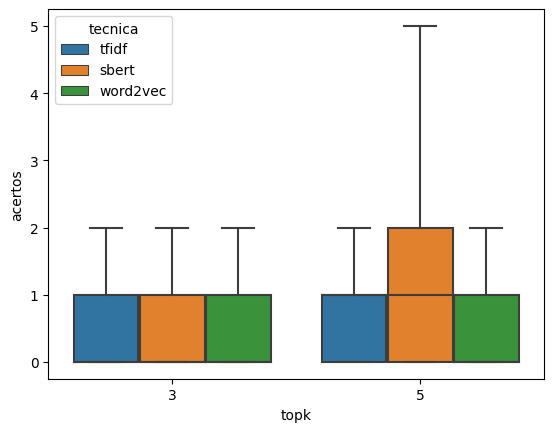

In [10]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

In [13]:
pd.options.display.max_rows = None
display(df)

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3971,tfidf,5,0,4,[src/main/java/org/jabref/logic/help/HelpFile....,[src/main/java/net/sf/jabref/gui/importer/fetc...,2018-04-29T12:18:50Z,43,Add RFC Standard Fetcher,0.000000,0.218712,0.166119,0.000000,jabref/jabref
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4233,tfidf,5,0,5,[src/main/java/org/jabref/gui/collab/ChangeSca...,"[src/main/java/org/jabref/gui/BasePanel.java, ...",2018-08-23T17:05:07Z,64,Nullpointerexception while merging entries,0.000000,0.217365,0.144060,0.125260,jabref/jabref
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4113,tfidf,5,0,2,[src/main/java/org/jabref/logic/integrity/Page...,[src/main/java/net/sf/jabref/gui/openoffice/OO...,2018-11-20T07:43:58Z,15,Improve check for page numbers,0.000000,0.208106,0.098549,0.000000,jabref/jabref
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4622,tfidf,5,7,7,[src/main/java/org/jabref/gui/JabRefFrame.java...,"[src/main/java/net/sf/jabref/JabRefMain.java, ...",2019-02-01T15:08:01Z,86,Reset preferences throws not on FX Thread exce...,0.400000,0.307038,0.159928,0.000000,jabref/jabref
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4591,tfidf,5,0,3,[src/main/java/org/jabref/logic/integrity/Edit...,[src/main/java/org/jabref/logic/integrity/Page...,2019-02-13T06:05:54Z,20,Add check for books with first edition,0.000000,0.172627,0.157353,0.140160,jabref/jabref
5,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4610,tfidf,5,3,5,[src/main/java/org/jabref/gui/groups/GroupDesc...,[src/main/java/org/jabref/gui/groups/GroupDial...,2019-02-21T21:24:22Z,77,Group window size and font inconsistency,0.120000,0.226769,0.109876,0.000000,jabref/jabref
6,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4668,tfidf,5,6,6,"[src/main/java/org/jabref/gui/Base.css, src/ma...","[src/main/java/org/jabref/gui/Base.css, src/ma...",2019-03-05T08:20:53Z,42,Main Menu: change File tab,0.400000,0.635527,0.251714,0.216631,jabref/jabref
7,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4673,tfidf,5,6,6,"[src/main/java/org/jabref/gui/Base.css, src/ma...","[src/main/java/org/jabref/gui/Base.css, src/ma...",2019-03-05T08:20:54Z,0,Main Menu: change View tab,1.000000,0.749519,0.665137,0.665137,jabref/jabref
8,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4584,tfidf,5,4,4,"[src/main/java/org/jabref/gui/Base.css, src/ma...","[src/main/java/org/jabref/gui/Base.css, src/ma...",2019-03-08T14:13:59Z,2,Toolbar icons and their layout need improvement,0.687500,0.253071,0.000000,0.000000,jabref/jabref
9,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4481,tfidf,5,0,4,"[src/main/java/org/jabref/JabRefMain.java, src...","[src/main/java/org/jabref/JabRefGUI.java, src/...",2019-03-15T08:51:58Z,39,JabRef Loads Very Slowly Windows 10 (4.3.1) an...,0.000000,0.104315,0.098559,0.077067,jabref/jabref
